In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing

import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

import seaborn as sns; sns.set()

%matplotlib inline

**Load and understand  Data**

In [ ]:
shelter_df = pd.read_csv("/content/shelter_data.csv")
text_df = pd.read_csv("/content/text_data.csv")
audio_df = pd.read_csv("/content/audio_data.csv")

In [ ]:
shelter_df.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


# Preprocessing Steps
 - Drop NA's
 - Remove Unused Columns
 - Fit an Encoder
 - Split data into a train and test set at 50% each

In [ ]:
# this line drops any rows with missing data
cleaned_data = shelter_df.dropna()
# here we grab the data we want from pandas
X_data = cleaned_data[['AnimalType','SexuponOutcome','AgeuponOutcome']]
y_data = cleaned_data[['OutcomeType']]
enc = OrdinalEncoder()
enc.fit(X_data)
le = preprocessing.LabelEncoder()
le.fit(y_data)
data_categorical = pd.DataFrame(enc.transform(X_data),
columns=list(X_data))
X=data_categorical
y=le.transform(y_data)
# Without changing the random state, divide your data into 50% for test and 50% for train
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.50, random_state=42)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Base Decision Tree Classifier

In [ ]:
#Apply the model here
clf = DecisionTreeClassifier(random_state=42)
clf = clf.fit(X_train, y_train)   #Fit on training data
y_pred = clf.predict(X_test)
print('accuracy %2.2f ' % accuracy_score(y_test,y_pred))

accuracy 0.73 


In [ ]:
# Let's see the confusion matrix together
cm = confusion_matrix(le.inverse_transform(y_test), le.inverse_transform(y_pred))
labels=['Adoption', 'Died', 'Euthanasia', 'Transfer']
test_results = pd.DataFrame(cm,index=labels,columns=labels)
display(test_results)

,Adoption,Died,Euthanasia,Transfer
Adoption,476,0,10,365
Died,3,0,1,31
Euthanasia,10,0,42,309
Transfer,164,0,40,2039


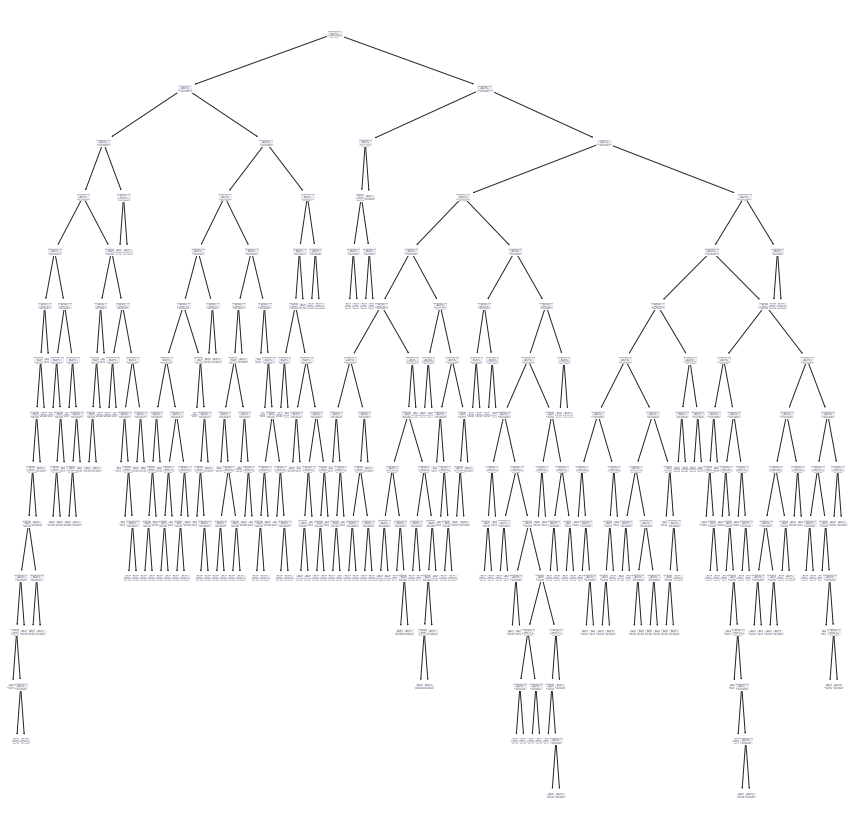

In [ ]:
# Plot the decision tree
fig,ax = plt.subplots(figsize = (15,15))
treeplot = tree.plot_tree(clf, feature_names=['AnimalType','SexuponOutcome','AgeuponOutcome'],
class_names = ['Adoption', 'Died', 'Euthanasia', 'Transfer'],ax=ax)


**Problem 2.1. Animal Control**

In [ ]:
# Train a new decision tree here! Remember this time maxdepth should be 3 (short tree)
clf3 = DecisionTreeClassifier(random_state=42, max_depth=3)
clf3 = clf3.fit(X_train, y_train)
y_pred3 = clf3.predict(X_test)
print('accuracy %2.2f ' % accuracy_score(y_test,y_pred3))

accuracy 0.66 


In [ ]:
# Let's see the confusion matrix together
cm = confusion_matrix(le.inverse_transform(y_test), le.inverse_transform(y_pred3))
labels=['Adoption', 'Died', 'Euthanasia', 'Transfer']
test_results = pd.DataFrame(cm,index=labels,columns=labels)
display(test_results)

,Adoption,Died,Euthanasia,Transfer
Adoption,65,0,0,786
Died,0,0,0,35
Euthanasia,0,0,1,360
Transfer,3,0,1,2239


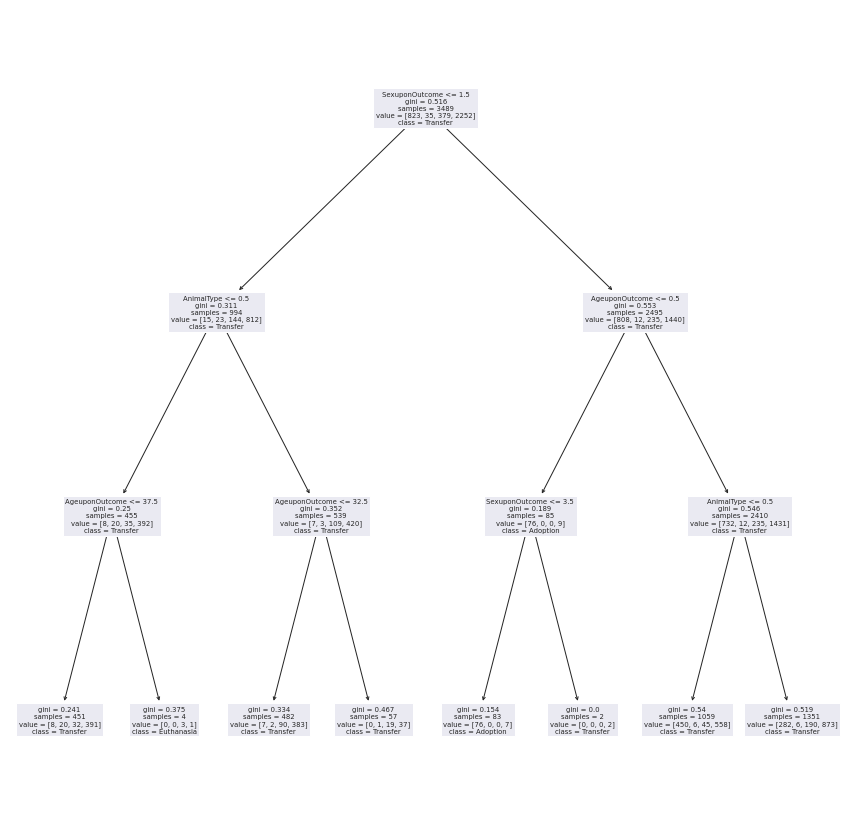

In [ ]:
# Plot the decision tree
fig,ax = plt.subplots(figsize = (15,15))
treeplot = tree.plot_tree(clf3, feature_names=['AnimalType','SexuponOutcome','AgeuponOutcome'],
class_names = ['Adoption', 'Died', 'Euthanasia', 'Transfer'],ax=ax)

**Varying Tree Depth using Loop**

Text(0, 0.5, 'Performance')

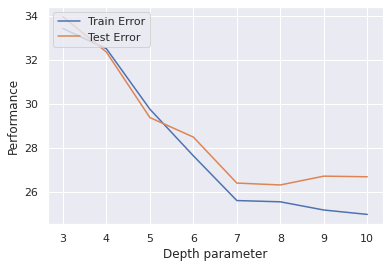

In [ ]:
train_errors = list()
test_errors = list()
for x in range(3,11):
  #Create multiple models here each based on the x variable above
  # Store the result of modes in train_erors and test_errors variables
    clfx = DecisionTreeClassifier(random_state=42, max_depth=x)
    clfx = clfx.fit(X_train, y_train)
    y1_pred = clfx.predict(X_train)
    train_errors.append((1 - accuracy_score(y_train,y1_pred)) * 100)

    y2_pred = clfx.predict(X_test)
    test_errors.append((1 - accuracy_score(y_test,y2_pred)) * 100)


# Plot of test and training erros
plt.plot(range(3,11),train_errors, label='Train Error')
plt.plot(range(3,11),test_errors, label='Test Error')
plt.legend(loc='upper left')
plt.xlabel('Depth parameter')
plt.ylabel('Performance')

*Your conclusion about above graph comes here*


**Tree Pruning here**

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

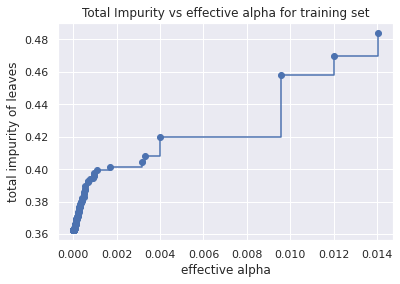

In [ ]:
tree_prune = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = tree_prune.ccp_alphas, tree_prune.impurities
b
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.03172364622964907


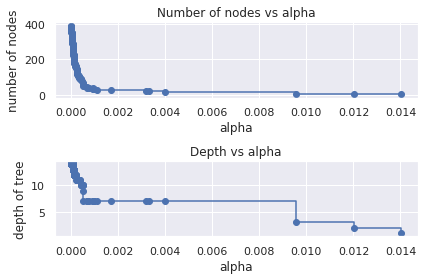

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

**Pruned Accuracy vs. Unpruned**

In [ ]:
tree_prune = DecisionTreeClassifier(ccp_alpha=0.0007)
tree_prune = tree_prune.fit(X_train,y_train)
y_pred_prune = tree_prune.predict(X_test)
print('accuracy %2.2f ' % accuracy_score(y_test,y_pred_prune))



accuracy 0.74 


In [ ]:
# Create two confusion matrices here. The first confusion matrix shows predictions for the pruned tree and the second one 
# predictions for the unpruned one
cm = confusion_matrix(le.inverse_transform(y_test), le.inverse_transform(y_pred))
labels=['Adoption', 'Died', 'Euthanasia', 'Transfer']
test_results = pd.DataFrame(cm,index=labels,columns=labels)
display(test_results)

cm = confusion_matrix(le.inverse_transform(y_test), le.inverse_transform(y_pred_prune))
labels=['Adoption', 'Died', 'Euthanasia', 'Transfer']
test_results = pd.DataFrame(cm,index=labels,columns=labels)
display(test_results)



,Adoption,Died,Euthanasia,Transfer
Adoption,476,0,10,365
Died,3,0,1,31
Euthanasia,10,0,42,309
Transfer,164,0,40,2039


,Adoption,Died,Euthanasia,Transfer
Adoption,463,0,17,371
Died,3,0,2,30
Euthanasia,7,0,33,321
Transfer,136,0,30,2077


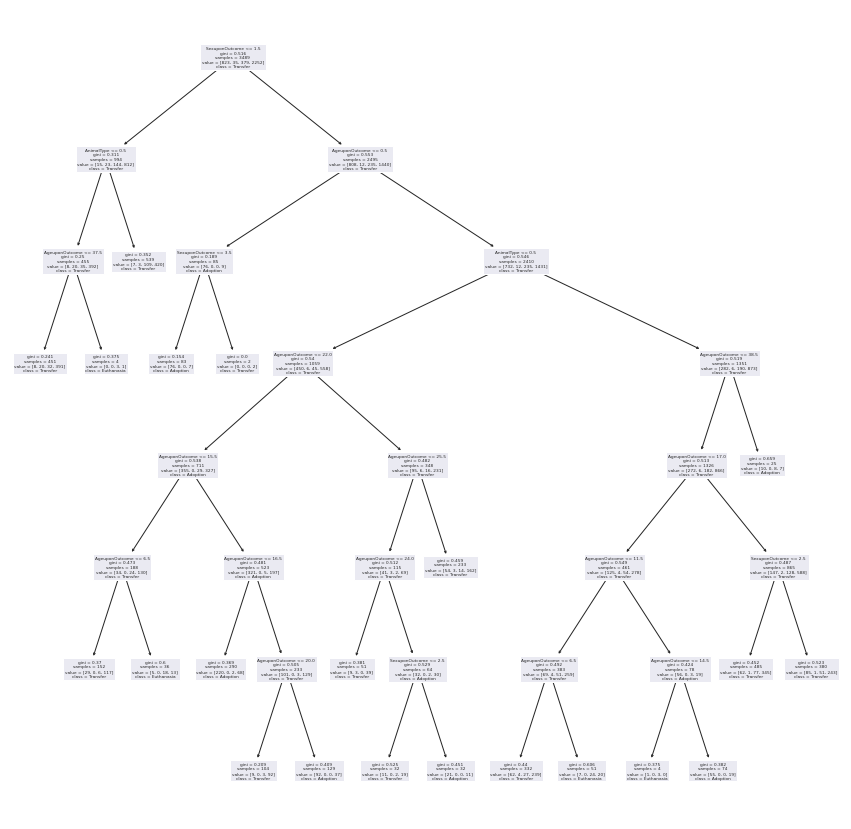

In [ ]:
fig,ax = plt.subplots(figsize = (15,15))
treeplot = tree.plot_tree(tree_prune, feature_names=['AnimalType','SexuponOutcome','AgeuponOutcome'],
class_names = ['Adoption', 'Died', 'Euthanasia', 'Transfer'],ax=ax)

**Text Data**

In [ ]:
text_df.head()

,Unnamed: 0,meta_author,meta_title,000,10,11,13,136,13th,1648,...,yielding,yoke,yokes,york,young,yourselves,zaleucus,zeal,zealand,zealous
0,0,hamilton,general introduction for the independent journ...,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,3,0,0
1,1,jay,concerning dangers from foreign force and infl...,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2,jay,the same subject continued concerning dangers ...,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,3,jay,the same subject continued concerning dangers ...,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,4,jay,the same subject continued concerning dangers ...,0,0,0,0,0,0,0,...,0,0,0,1,1,1,0,0,0,0


In [ ]:
text_df.meta_author.unique()

array(['hamilton', 'jay', 'madison', 'madison with hamilton'],
      dtype=object)

In [ ]:
# this line drops any rows with missing data
cleaned_data = text_df.dropna()
# here we grab the data we want from pandas
y_data = cleaned_data[['meta_author']]

X_data = cleaned_data.drop(columns=['meta_author'],)
enc = OrdinalEncoder()
enc.fit(X_data)
le = preprocessing.LabelEncoder()
le.fit(y_data)
data_categorical = pd.DataFrame(enc.transform(X_data),
columns=list(X_data))
X=data_categorical
y=le.transform(y_data)
# Without changing the random state, divide your data into 50% for test and 50% for train
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.90, random_state=42)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#Apply the model here
clf = DecisionTreeClassifier(random_state=42)
clf = clf.fit(X_train, y_train)   #Fit on training data
y_pred = clf.predict(X_test)
print('accuracy %2.2f ' % accuracy_score(y_test,y_pred))

accuracy 0.33 


In [ ]:
# Let's see the confusion matrix together
cm = confusion_matrix(le.inverse_transform(y_test), le.inverse_transform(y_pred))
labels = ['hamilton', 'jay', 'madison', 'madison with hamilton']
test_results = pd.DataFrame(cm, index=labels, columns=labels)
display(test_results)

,hamilton,jay,madison,madison with hamilton
hamilton,3,0,3,1
jay,1,0,0,0
madison,0,0,0,0
madison with hamilton,0,0,1,0


**Problem 2.2**

Text(0, 0.5, 'Performance')

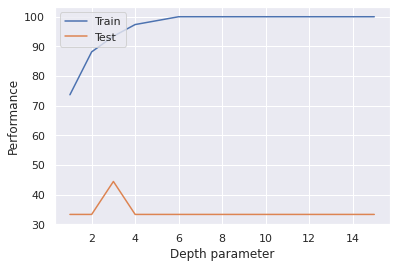

In [ ]:
#Create a loop of max depth from 1 to 16 similar to previous step and draw the 
#above mentioned graph
train_errors = list()
test_errors = list()
for x in range(1,16):
  #Create multiple models here each based on the x variable above
  # Store the result of modes in train_erors and test_errors variables
    clfx = DecisionTreeClassifier(random_state=42, max_depth=x)
    clfx = clfx.fit(X_train, y_train)
    y1_pred = clfx.predict(X_train)
    train_errors.append(accuracy_score(y_train,y1_pred) * 100)

    y2_pred = clfx.predict(X_test)
    test_errors.append(accuracy_score(y_test,y2_pred) * 100)


# Plot of test and training erros
plt.plot(range(1,16),train_errors, label='Train')
plt.plot(range(1,16),test_errors, label='Test')
plt.legend(loc='upper left')
plt.xlabel('Depth parameter')
plt.ylabel('Performance')

In [ ]:
# With a simple code, you can see the frequency of the words
text_frequecies = X.sum()
text_frequecies.sort_values()
display(text_frequecies)
kept_words = text_frequecies[text_frequecies<2]
# this line (above) first creates a binary vector for each word, telling us if it appears twice or more
# in the dataset. it then uses that vector to index into text_frequencies to subset only the data
# for which this binary vector evaluates to TRUE. This simple indexing can really help to chop through
# a huge pandas dataframe.
print(kept_words)
small_vocab_X= X [kept_words.index]
# notice how kept_words.index is a list of strings, the same you can use to access the headers of X..

Unnamed: 0    3570.0
meta_title    3494.0
000              1.0
10               1.0
11               1.0
               ...  
yourselves       1.0
zaleucus         1.0
zeal            26.0
zealand          1.0
zealous          8.0
Length: 8562, dtype: float64

000           1.0
10            1.0
11            1.0
13            1.0
136           1.0
             ... 
yes           1.0
yokes         1.0
yourselves    1.0
zaleucus      1.0
zealand       1.0
Length: 3143, dtype: float64


Text(0, 0.5, 'Performance')

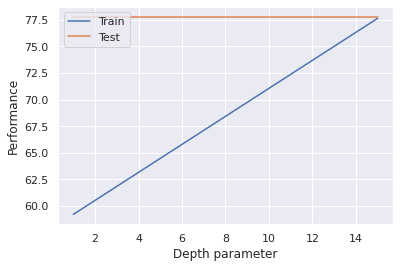

In [ ]:
# Now repeat the previous analysis (design model by changing the model depth 
#from 1 to 16) with smaller word dataset small_vocab_X
# Plot the above graph again
X_train, X_test, y_train, y_test = train_test_split(small_vocab_X,y,train_size=0.90, random_state=42)
train_errors = list()
test_errors = list()
for x in range(1,16):
  #Create multiple models here each based on the x variable above
  # Store the result of modes in train_erors and test_errors variables
    clfx = DecisionTreeClassifier(random_state=42, max_depth=x)
    clfx = clfx.fit(X_train, y_train)
    y1_pred = clfx.predict(X_train)
    train_errors.append(accuracy_score(y_train,y1_pred) * 100)

    y2_pred = clfx.predict(X_test)
    test_errors.append(accuracy_score(y_test,y2_pred) * 100)


# Plot of test and training erros
plt.plot(range(1,16),train_errors, label='Train')
plt.plot(range(1,16),test_errors, label='Test')
plt.legend(loc='upper left')
plt.xlabel('Depth parameter')
plt.ylabel('Performance')

**Most frequent words**

In [ ]:
# Same as before create the most frequent words
kept_words2 = text_frequecies[text_frequecies>100]
# this line (above) first creates a binary vector for each word, telling us if it appears twice or more
# in the dataset. it then uses that vector to index into text_frequencies to subset only the data
# for which this binary vector evaluates to TRUE. This simple indexing can really help to chop through
# a huge pandas dataframe.
print(kept_words2)
large_vocab_X= X [kept_words2.index]

Unnamed: 0    3570.0
meta_title    3494.0
against        322.0
all            634.0
america        113.0
               ...  
whether        109.0
whole          139.0
within         115.0
without        204.0
yet            121.0
Length: 143, dtype: float64


Text(0, 0.5, 'Performance')

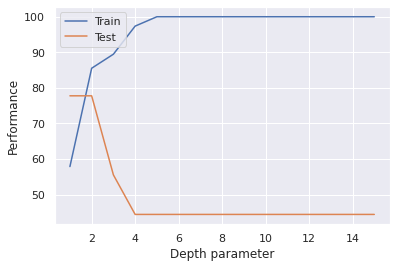

In [ ]:
# Now repeat the previous analysis (design model by changing the model depth 
#from 1 to 16) with smaller word dataset small_vocab_X
# Plot the above graph again
X_train, X_test, y_train, y_test = train_test_split(large_vocab_X,y,train_size=0.90, random_state=42)
train_errors = list()
test_errors = list()
for x in range(1,16):
  #Create multiple models here each based on the x variable above
  # Store the result of modes in train_erors and test_errors variables
    clfx = DecisionTreeClassifier(random_state=42, max_depth=x)
    clfx = clfx.fit(X_train, y_train)
    y1_pred = clfx.predict(X_train)
    train_errors.append(accuracy_score(y_train,y1_pred) * 100)

    y2_pred = clfx.predict(X_test)
    test_errors.append(accuracy_score(y_test,y2_pred) * 100)


# Plot of test and training erros
plt.plot(range(1,16),train_errors, label='Train')
plt.plot(range(1,16),test_errors, label='Test')
plt.legend(loc='upper left')
plt.xlabel('Depth parameter')
plt.ylabel('Performance')

In analyzing the graphs, we can see that as the small vocab set increases in depth the training accuracy increases but the test accuracy in constant throughout. This could be due to the small amount of data in the small vocab list. Whereas with the large vocab dataset, there is significantly more data but it seems to perform well on the Training data but wash out on the test data. This could be due to the high volume and lack of variance in the test data.

**Audio Data**

In [ ]:
audio_df.head()

,Unnamed: 0,filename,label_text,label,0.00 hz,86.13 hz,172.27 hz,258.40 hz,344.53 hz,430.66 hz,...,10249.80 hz,10335.94 hz,10422.07 hz,10508.20 hz,10594.34 hz,10680.47 hz,10766.60 hz,10852.73 hz,10938.87 hz,11025.00 hz
0,0,70Funk.wav,snare,0,0.117469,0.201065,3.666227,7.554432,5.356165,2.470225,...,0.000272,0.000199,0.000083,0.000071,0.000068,0.000041,0.000003,5.277616e-07,1.054685e-07,7.286777e-09
1,1,8oh8 Rim.wav,snare,0,0.003148,0.012814,0.375678,1.050320,0.164903,0.089524,...,0.001122,0.000737,0.000304,0.000211,0.000128,0.000036,0.000006,1.266412e-06,1.366164e-07,3.532417e-09
2,2,8oh8 Tin.wav,snare,0,0.006759,0.039368,0.385903,0.254091,0.086651,0.137728,...,0.000633,0.000391,0.000169,0.000128,0.000074,0.000024,0.000003,7.285032e-07,7.223851e-08,2.491626e-09
3,3,8oh8 Snr.wav,snare,0,0.003083,0.001359,0.021241,0.053261,0.026645,0.393541,...,0.004249,0.002850,0.001079,0.000781,0.000527,0.000161,0.000024,5.044927e-06,5.018216e-07,5.197483e-08
4,4,9oh9 Rim.wav,snare,0,0.006571,0.007394,0.033357,0.458574,1.056414,0.435841,...,0.000267,0.000211,0.000077,0.000065,0.000033,0.000008,0.000003,7.358946e-07,4.149365e-08,3.860568e-09


**Problem 2.3**

In [ ]:
cleaned_data = audio_df.drop(columns=["filename","label","Unnamed: 0"])
cleaned_data.head(2)

,label_text,0.00 hz,86.13 hz,172.27 hz,258.40 hz,344.53 hz,430.66 hz,516.80 hz,602.93 hz,689.06 hz,...,10249.80 hz,10335.94 hz,10422.07 hz,10508.20 hz,10594.34 hz,10680.47 hz,10766.60 hz,10852.73 hz,10938.87 hz,11025.00 hz
0,snare,0.117469,0.201065,3.666227,7.554432,5.356165,2.470225,1.962373,0.752758,0.422277,...,0.000272,0.000199,0.000083,0.000071,0.000068,0.000041,0.000003,5.277616e-07,1.054685e-07,7.286777e-09
1,snare,0.003148,0.012814,0.375678,1.050320,0.164903,0.089524,0.167692,0.152230,0.117283,...,0.001122,0.000737,0.000304,0.000211,0.000128,0.000036,0.000006,1.266412e-06,1.366164e-07,3.532417e-09


In [ ]:
X_audio = cleaned_data.drop(columns=['label_text'])
y_audio = cleaned_data['label_text']
X_train, X_test, y_train, y_test = train_test_split(X_audio,y_audio,train_size=0.80, random_state=42)

Text(0, 0.5, 'Performance')

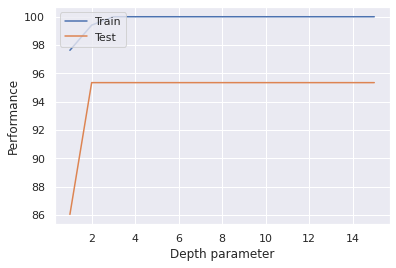

In [ ]:
train_errors = list()
test_errors = list()
for x in range(1,16):
  #Create multiple models here each based on the x variable above
  # Store the result of modes in train_erors and test_errors variables
    clfx = DecisionTreeClassifier(random_state=42, max_depth=x)
    clfx = clfx.fit(X_train, y_train)
    y1_pred = clfx.predict(X_train)
    train_errors.append(accuracy_score(y_train,y1_pred) * 100)

    y2_pred = clfx.predict(X_test)
    test_errors.append(accuracy_score(y_test,y2_pred) * 100)


# Plot of test and training erros
plt.plot(range(1,16),train_errors, label='Train')
plt.plot(range(1,16),test_errors, label='Test')
plt.legend(loc='upper left')
plt.xlabel('Depth parameter')
plt.ylabel('Performance')

In [ ]:
sound_tree1 = DecisionTreeClassifier(random_state=42, max_depth=5) 
sound_tree1 = sound_tree1.fit(X_train,y_train)

In [ ]:
X_dropped = X_audio.drop(1)
y= pd.Series(y_audio)
y_drop = y.drop(1)
X_train, X_test, y_train, y_test = train_test_split(X_dropped,y_drop,train_size=0.80, random_state=42)#80% training

sound_tree2 = DecisionTreeClassifier(random_state=42, max_depth=5) 
sound_tree2 = sound_tree2.fit(X_train,y_train)

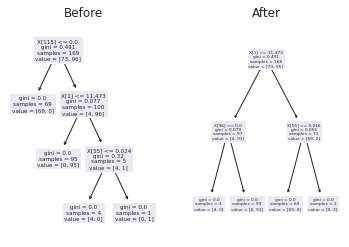

In [ ]:
plt.subplot(1, 2, 1)
treeplot = tree.plot_tree(sound_tree1)
plt.title("Before")
plt.subplot(1, 2, 2)
treeplot2 = tree.plot_tree(sound_tree2)
plt.title("After")
plt.show()

3.3 Cross-Validation

In [ ]:

X = X_audio
X_train, X_test, y_train, y_test = train_test_split(X,y_audio,train_size=0.50, random_state=42)

Text(0, 0.5, 'Performance')

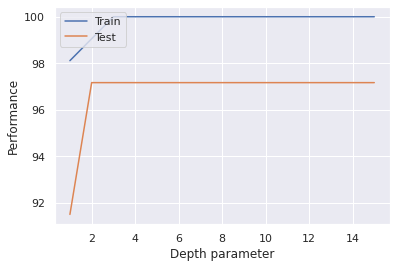

In [ ]:
train_errors = list()
test_errors = list()
for x in range(1,16):
  #Create multiple models here each based on the x variable above
  # Store the result of modes in train_erors and test_errors variables
    sound_trees = DecisionTreeClassifier(random_state=42, max_depth=x)
    sound_trees = sound_trees.fit(X_train, y_train)
    y1_pred = sound_trees.predict(X_train)
    train_errors.append(accuracy_score(y_train,y1_pred) * 100)

    y2_pred = sound_trees.predict(X_test)
    test_errors.append(accuracy_score(y_test,y2_pred) * 100)


# Plot of test and training erros
plt.plot(range(1,16),train_errors, label='Train')
plt.plot(range(1,16),test_errors, label='Test')
plt.legend(loc='upper left')
plt.xlabel('Depth parameter')
plt.ylabel('Performance')

**Bad Classifiers**

In [ ]:
class BadClassifier():
  def __init__(self):
    pd = __import__('pandas')
    self.label_counts = pd.Series()
  def train(self, y_train):
    train_labels = pd.Series(y_train)
    label_counts = train_labels.value_counts(normalize=True)
    self.label_counts = label_counts.sort_index()
  def make_random_predictions(self, X_test):
    pred_labels=[]
    test_labels = pd.Series(y_test)
    test_label_counts = np.random.multinomial(X_test.shape[0],self.label_counts.values)
    for count,label in zip (test_label_counts,self.label_counts.index.values):
      pred_labels = pred_labels + [label for x in range(0,count)]
    np.random.shuffle(pred_labels)
    return pred_labels

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.


Text(0, 0.5, 'Performance')

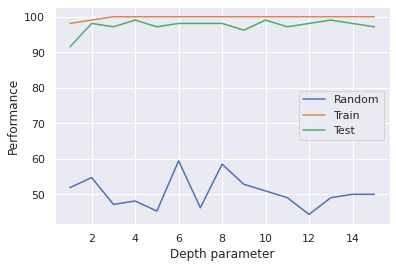

In [ ]:
bad = BadClassifier()
accuracy = list()
train_errors = list()
test_errors = list()
for x in range(1,16):
  bad.train(y_train)
  y_pred = bad.make_random_predictions(X_test)
  accuracy.append(accuracy_score(y_train,y_pred) * 100)
  sound_trees = DecisionTreeClassifier(max_depth=x) 
  sound_trees = sound_trees.fit(X_train,y_train)
  y_pred1 = sound_trees.predict(X_train)
  train_errors.append(accuracy_score(y_train,y_pred1) * 100)# Fill this
  y_pred2 = sound_trees.predict(X_test)
  test_errors.append(accuracy_score(y_test,y_pred2) * 100)# Fill this
# plotting
plt.plot(range(1,16),accuracy, label='Random')
plt.plot(range(1,16),train_errors, label='Train')
plt.plot(range(1,16),test_errors, label='Test')
plt.legend(loc='center right')
plt.xlabel('Depth parameter')
plt.ylabel('Performance')


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.01, random_state=42)

## This code runs in Jupyter but not in collab for the smaller dataset.
## ValueError: Found input variables with inconsistent numbers of samples: [2, 210]

bad = BadClassifier()
accuracy = list()
train_errors = list()
test_errors = list()
for x in range(1,16):
  bad.train(y_train)
  y_pred = bad.make_random_predictions(X_test)
  accuracy.append(accuracy_score(y_train,y_pred) * 100)
  sound_trees = DecisionTreeClassifier(max_depth=x) 
  sound_trees = sound_trees.fit(X_train,y_train)
  y_pred1 = sound_trees.predict(X_train)
  train_errors.append(accuracy_score(y_train,y_pred1) * 100)# Fill this
  y_pred2 = sound_trees.predict(X_test)
  test_errors.append(accuracy_score(y_test,y_pred2) * 100)# Fill this
# plotting
plt.plot(range(1,16),accuracy, label='Random')
plt.plot(range(1,16),train_errors, label='Train')
plt.plot(range(1,16),test_errors, label='Test')
plt.legend(loc='center right')
plt.xlabel('Depth parameter')
plt.ylabel('Performance')
